## Imbalanced Dataset

In [1]:
from collections import Counter
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(
    n_samples=10000, n_features=2, n_classes=2, 
    weights=[0.99],
    n_redundant=0, n_clusters_per_class=1, random_state=10)

In [3]:
X

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]], shape=(10000, 2))

In [4]:
Counter(y)

Counter({np.int64(0): 9846, np.int64(1): 154})

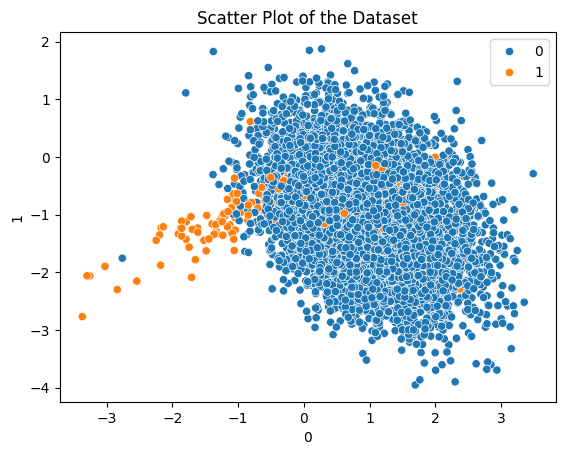

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)
plt.title('Scatter Plot of the Dataset')
plt.show()

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10], 'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'], 'class_weight': [{0:w,1:y } for w in [1, 10, 50, 100] for y in [1, 10, 50, 100]]}

In [8]:
from sklearn.model_selection import GridSearchCV
log_reg = LogisticRegression()
grid_search = GridSearchCV(estimator=log_reg, param_grid=params, scoring='accuracy', cv=5)
grid_search.fit(X, y)


d:\Machine Learning Full\Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Machine Learning Full\Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Machine Learning Full\Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Machine Learning Full\Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Machine Learning Full\Machine Learning\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,estimator,LogisticRegression()
,param_grid,"{'C': [0.001, 0.01, ...], 'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10}, ...], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [9]:
print(grid_search.best_score_)
print(grid_search.best_params_)


0.9888
{'C': 0.01, 'class_weight': {0: 10, 1: 50}, 'penalty': 'l2', 'solver': 'newton-cg'}


In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = grid_search.predict(X)
print("Accuracy:", accuracy_score(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))


Accuracy: 0.9887
Confusion Matrix:
 [[9832   14]
 [  99   55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      9846
           1       0.80      0.36      0.49       154

    accuracy                           0.99     10000
   macro avg       0.89      0.68      0.74     10000
weighted avg       0.99      0.99      0.99     10000

